Train data is analysed further to plot the distributions and the time series.  

https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [3]:
## read in train and test data 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49666 entries, 0 to 49665
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           49666 non-null  object 
 1   LV ActivePower (kW)            49666 non-null  float64
 2   Wind Speed (m/s)               49666 non-null  float64
 3   Theoretical_Power_Curve (KWh)  49666 non-null  float64
 4   Wind Direction (°)             49666 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [5]:
train.head()

,Date,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


In [6]:
test.head()

,Date,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-12-26 00:00:00,394.483887,11.23912,3350.492384,25.707260
1,2018-12-26 00:10:00,369.472809,11.01617,3278.121125,25.653749
2,2018-12-26 00:20:00,342.465393,10.68914,3151.278731,26.026560
3,2018-12-26 00:30:00,379.872101,10.95354,3255.790569,25.367300
4,2018-12-26 00:40:00,346.712891,10.38256,3007.924280,24.966379


In [7]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [8]:
## dependency on month for wind speed 
train['month'] = train['Date'].dt.month
train['hour'] = train['Date'].dt.hour


In [9]:
train.set_index(['Date'], inplace = True)
test.set_index(['Date'], inplace = True)

In [10]:
cols = train.columns.tolist()

In [11]:
## Visualize the variables on time axis 

Text(0.5, 0, 'LV ActivePower (kW)')

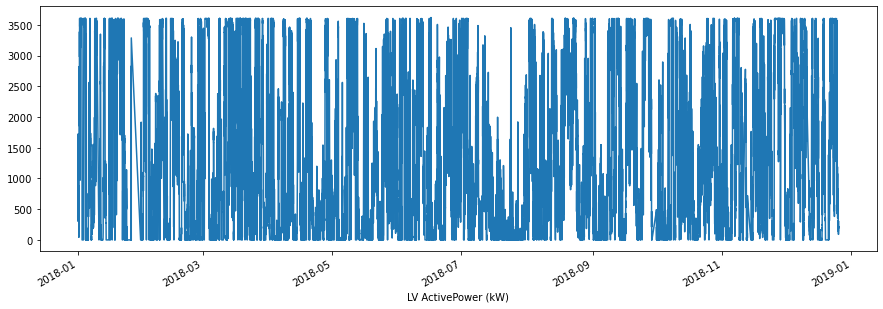

In [12]:
plt.figure(figsize = (15,5))
train[cols[0]].plot()
plt.xlabel(cols[0])

Text(0.5, 0, 'Wind Speed (m/s)')

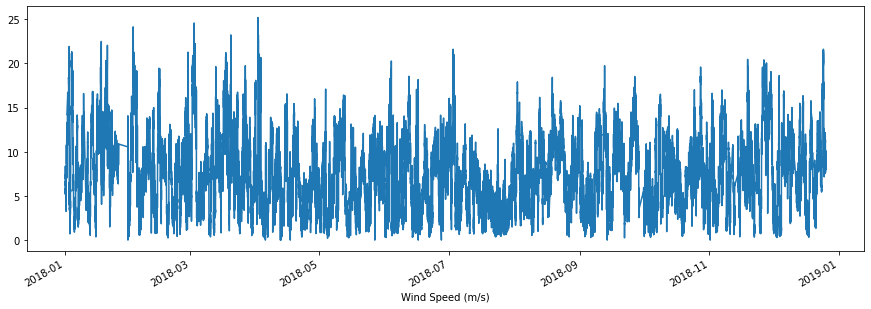

In [13]:
plt.figure(figsize = (15,5))
train[cols[1]].plot()
plt.xlabel(cols[1])

Text(0.5, 0, 'Theoretical_Power_Curve (KWh)')

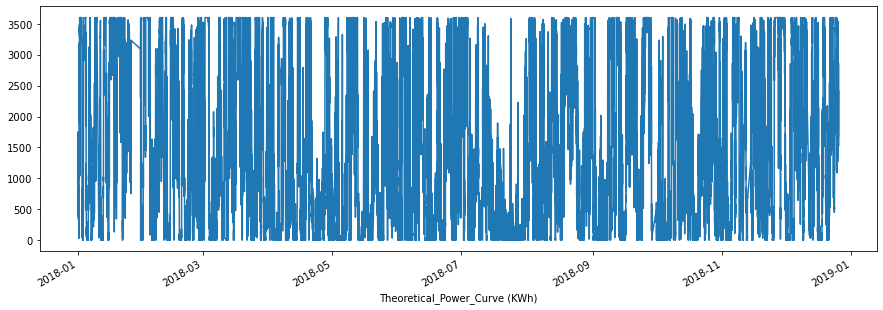

In [14]:
plt.figure(figsize = (15,5))
train[cols[2]].plot()
plt.xlabel(cols[2])

Text(0.5, 0, 'Wind Direction (°)')

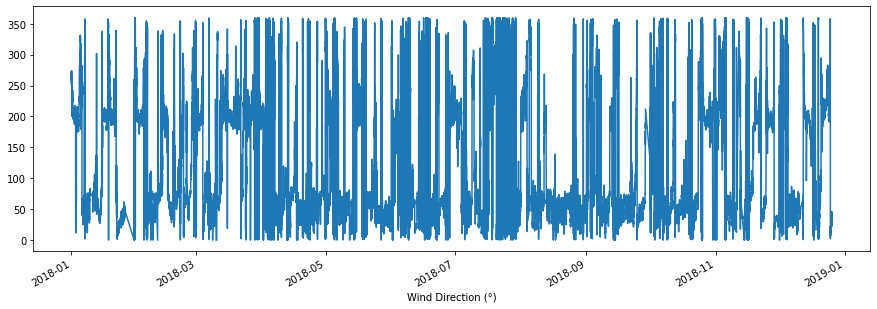

In [15]:
plt.figure(figsize = (15,5))
train[cols[3]].plot()
plt.xlabel(cols[3])

In [16]:
## Is there a relation between wind speed and Active Power ?
train[cols[:2]].corr()

,LV ActivePower (kW),Wind Speed (m/s)
LV ActivePower (kW),1.000000,0.913447
Wind Speed (m/s),0.913447,1.000000


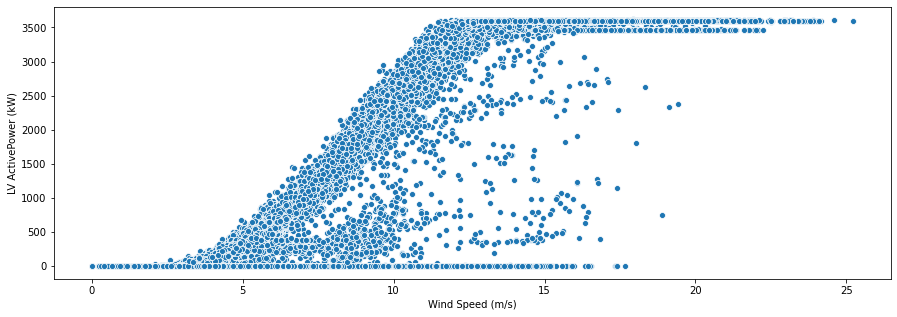

In [17]:
## plot the relation 
plt.figure(figsize = (15,5))
sns.scatterplot(cols[1] , cols[0] , data = train)

In [18]:
train[(train[cols[1]] >= 0) & (train[cols[0]] <=0) ]

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,hour
Date,,,,,,
2018-03-01 15:40:00,0.000000,3.743307,83.986265,245.068207,3,15
2018-03-01 16:00:00,-0.393068,2.185888,0.000000,238.410294,3,16
2018-03-01 16:10:00,0.000000,2.142016,0.000000,234.762405,3,16
2018-03-01 16:20:00,0.000000,2.501406,0.000000,223.308807,3,16
2018-03-01 16:30:00,0.000000,2.668578,0.000000,226.051697,3,16
...,...,...,...,...,...,...
2018-12-21 07:30:00,0.000000,3.618268,66.365003,227.282806,12,7
2018-12-21 07:40:00,0.000000,3.199864,25.591292,209.822906,12,7
2018-12-21 07:50:00,0.000000,2.878116,0.000000,210.649200,12,7


Power generated increases linearly with speed when the speed is between 2 - 12 (units). 
After that it remains at the peak power.  
The power remains zero or negative for a set of varying wind speed. This may indicate a problem with the turbines.  

In [19]:
## No wind speed should be equal to no wind power 
train[(train[cols[1]] == 0 ) & (train[cols[0]] ==0)]

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,hour
Date,,,,,,
2018-11-01 09:50:00,0.0,0.0,0.0,0.0,11,9
2018-01-30 16:40:00,0.0,0.0,0.0,0.0,1,16
2018-04-17 06:50:00,0.0,0.0,0.0,0.0,4,6
2018-04-05 13:10:00,0.0,0.0,0.0,0.0,4,13
2018-05-27 03:50:00,0.0,0.0,0.0,0.0,5,3
2018-06-16 15:40:00,0.0,0.0,0.0,0.0,6,15
2018-06-27 14:00:00,0.0,0.0,0.0,0.0,6,14
2018-09-13 19:50:00,0.0,0.0,0.0,0.0,9,19
2018-04-12 14:50:00,0.0,0.0,0.0,0.0,4,14


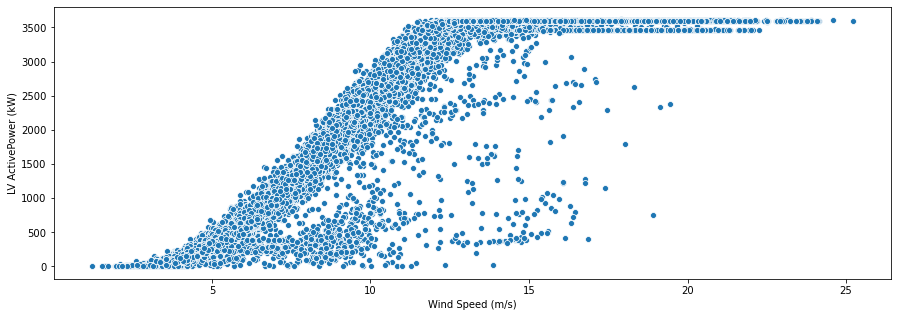

In [20]:
## drop the records that have zero power values for non zero wind speed and plot the graph 
## plot the relation 
plt.figure(figsize = (15,5))
sns.scatterplot(cols[1] , cols[0] , data = train[(train[cols[1]] > 0) & (train[cols[0]] > 0) ])


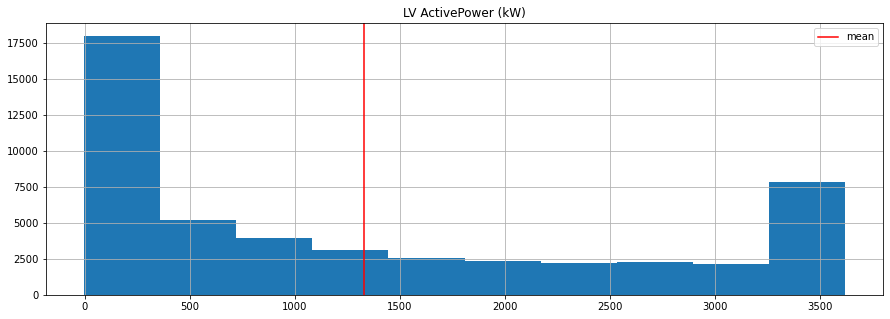

In [27]:
## plot the distribution of each variable 
plt.figure(figsize = (15,5))
train[cols[0]].hist()
plt.axvline(train[cols[0]].mean(), color = 'red', label = 'mean')
plt.title(cols[0])
plt.legend()

LV Active power is positively skewed with a right tail.  

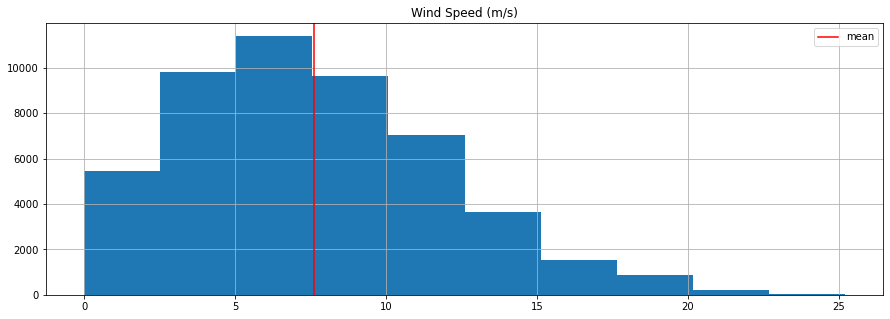

In [25]:
plt.figure(figsize = (15,5))
train[cols[1]].hist()
plt.axvline(train[cols[1]].mean(), color = 'red', label = 'mean')
plt.title(cols[1])
plt.legend()

wind speed appears to have less skew as compared to LV Active power.  

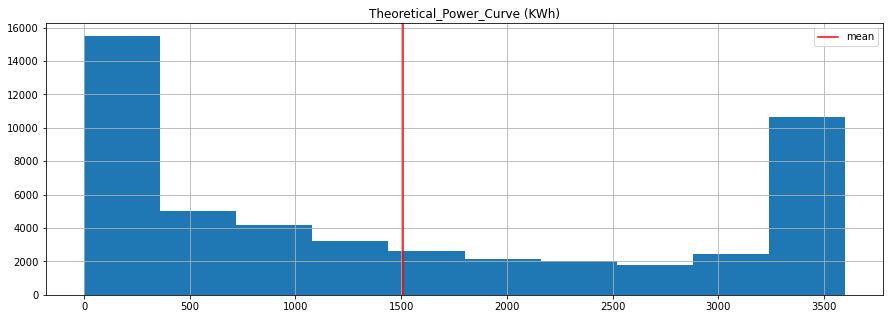

In [28]:
plt.figure(figsize = (15,5))
train[cols[2]].hist()
plt.axvline(train[cols[2]].mean(), color = 'red', label = 'mean')
plt.title(cols[2])
plt.legend()

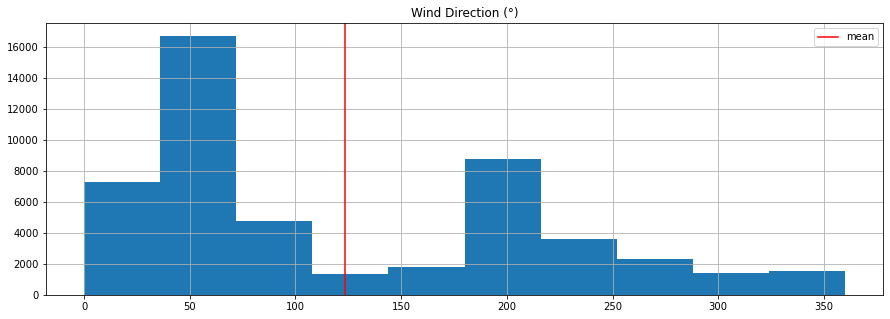

In [29]:
plt.figure(figsize = (15,5))
train[cols[3]].hist()
plt.axvline(train[cols[3]].mean(), color = 'red', label = 'mean')
plt.title(cols[3])
plt.legend()

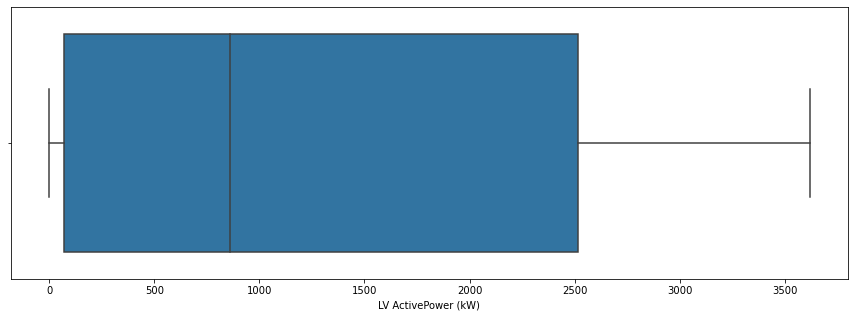

In [30]:
## box plot to understand the dispersion of the variables .
plt.figure(figsize = (15,5))
sns.boxplot(train[cols[0]])

LV Active power does not have outliers which means that all the values seem to be from the same distribution.  

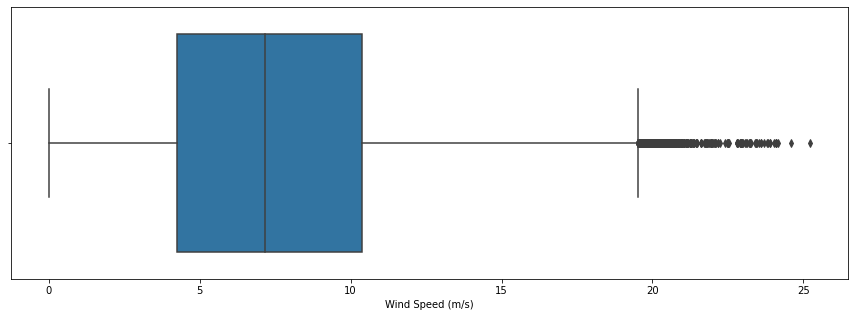

In [31]:
plt.figure(figsize = (15,5))
sns.boxplot(train[cols[1]])

For wind speed , values > 19 are outliers. 

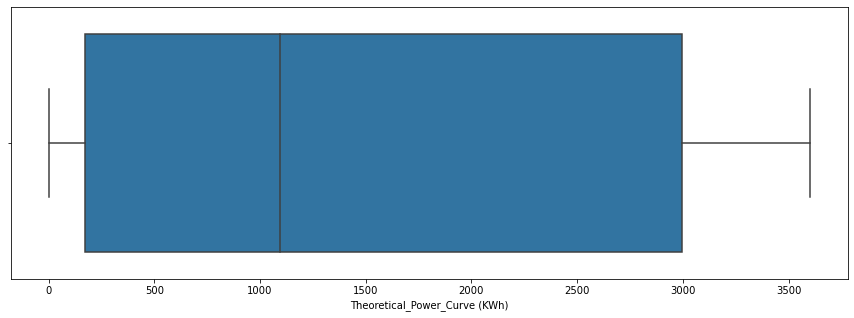

In [32]:
plt.figure(figsize = (15,5))
sns.boxplot(train[cols[2]])

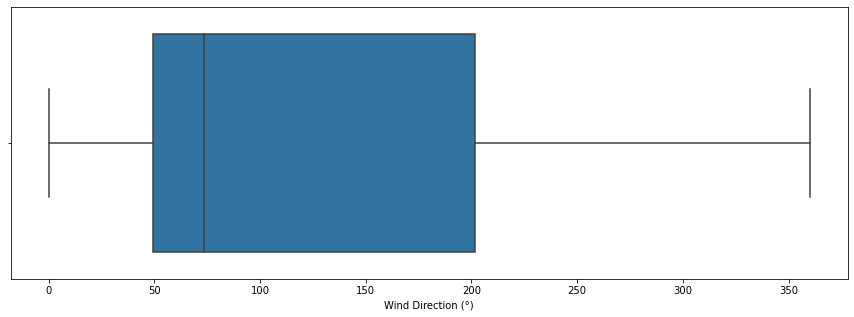

In [33]:
plt.figure(figsize = (15,5))
sns.boxplot(train[cols[3]])

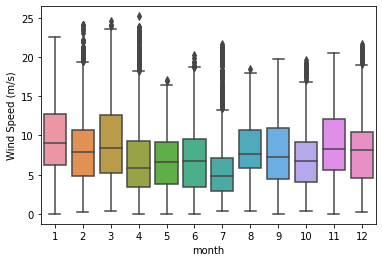

In [34]:
sns.boxplot('month' , cols[1] , data = train)

Wind speed is low in the months of April to July.  
Good amount of speed in March , November.  

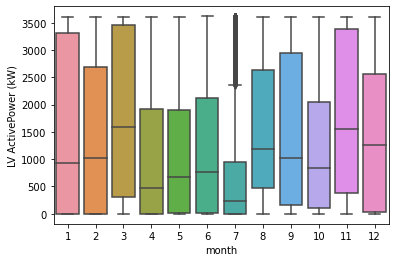

In [35]:
sns.boxplot('month' , cols[0] , data = train)

In the months of April to July , power generation is low.  
January , March and November have high power generation.  

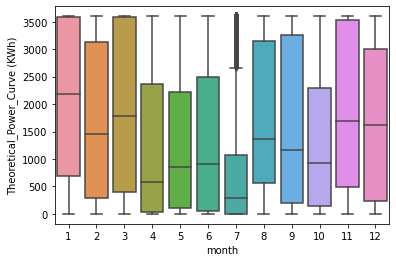

In [36]:
sns.boxplot('month' , cols[2] , data = train)

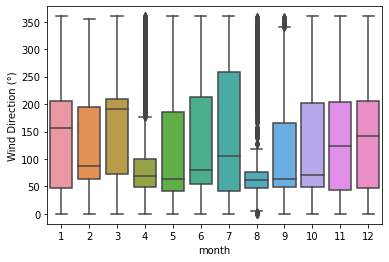

In [37]:
sns.boxplot('month' , cols[3] , data = train)